<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week04/WineQuality-WhiteWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", sep = ";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [54]:
missing_values = df.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [55]:
y = df['quality']
x = df.drop('quality', axis=1)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3673, 11), (1225, 11), (3673,), (1225,))

In [57]:
print ("\nLogistic Regression")

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


Logistic Regression
0.45387755102040817
[[  0   0   2   7   0   0]
 [  0   0  21  34   2   0]
 [  0   0 110 265   0   0]
 [  0   3  76 443   0   0]
 [  0   0  20 200   3   0]
 [  0   0   1  38   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
print ("\nDecision Tree")

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


Decision Tree
0.5991836734693877
[[  0   0   6   3   0   0   0]
 [  0  17  18  19   1   1   1]
 [  0   7 232 114  20   2   0]
 [  1   7  89 346  61  17   1]
 [  1   3  18  65 123  12   1]
 [  0   0   1   9  12  16   1]
 [  0   0   0   0   0   0   0]]


In [59]:
print ("\nRandom Forest")

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)

pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


Random Forest
0.6677551020408163
[[  0   0   4   5   0   0]
 [  0   8  26  20   3   0]
 [  0   0 246 124   5   0]
 [  0   0  56 431  34   1]
 [  0   0   9  93 121   0]
 [  0   0   1  16  10  12]]


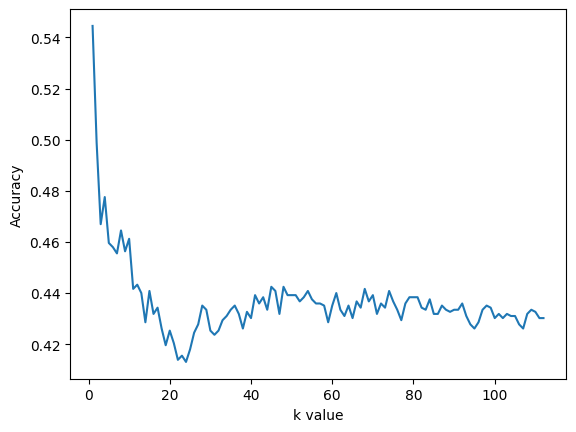

In [60]:
k_range = range(1, 113)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))

plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()